In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats

In [2]:
NumOfData=pd.read_csv('C:/Users/bigcompetmgr01/프로젝트/연료모드별로자른data/AmountOfDataAll',sep=',')
NumOfData=NumOfData.set_index('Unnamed: 0')
NumOfData

,test_normal,test_abnormal,train_normal,train_abnormal
Unnamed: 0,,,,
mode 2,54,34,19,22
mode 3,31,31,172,706


In [3]:
for i in range(int(NumOfData['train_normal'].iloc[1])):
    s1="df_%d=pd.read_csv('C:/Users/bigcompetmgr01/프로젝트/연료모드별로자른data/train_normal_mode3_%d')" %(i+1,i+1)
    exec(s1)
df=pd.concat([df_1])
for i in range(int(NumOfData['train_normal'].iloc[1])-1):
    s2="df=pd.concat([df,df_%d],ignore_index=True)" %(i+2)
    exec(s2)
train_normal_mode3_all=df
train_normal_mode3_all # 전처리된 train 데이터의 정상 데이터 중 연료모드 3에 해당하는 데이터 전체

,"Air temp, TC inlet (TE29)",Base duration gas admission,"Charge Air press, Engine Inlet (PT21X)","Charge Air temp, Engine Inlet (TE21X)",DVT control air press (PT43),Engine Load percent,Engine Speed 1 (SE11),Exh. Gas temp average,"Exh. Gas temp, TC Inlet","Exh. Gas temp, TC Outlet",...,"HT CW temp, Engine Outlet (TE76)",IMEP average,"LT CW press, Air Cooler Inlet (PT71)","LT CW temp, Air Cooler Inlet (TE71)","LT CW temp, Air Cooler Outlet (TE72)",Main bearing temp average,Pmax average,TC speed,Waste Gate Valve position command (CV26),dateTime
0,33.246667,74.133333,2.832783,47.673333,5.531417,58.121667,719.933333,457.433333,532.796667,398.510000,...,81.423333,14.045333,3.0,48.150000,49.451667,77.450909,96.586667,18939.05,1.563333,2019-09-01 16:11:15
1,33.248333,74.133333,2.832833,47.671667,5.531433,58.121667,719.933333,457.425000,532.805000,398.528333,...,81.421667,14.045167,3.0,48.143333,49.443333,77.460606,96.582833,18939.25,1.570000,2019-09-01 16:11:16
2,33.250000,74.133333,2.832883,47.670000,5.531450,58.121667,719.933333,457.416667,532.813333,398.546667,...,81.420000,14.045000,3.0,48.136667,49.435000,77.470303,96.579000,18939.45,1.576667,2019-09-01 16:11:17
3,33.251667,74.133333,2.832933,47.668333,5.531467,58.121667,719.935000,457.408333,532.825000,398.565000,...,81.420000,14.044833,3.0,48.130000,49.426667,77.479848,96.575667,18939.65,1.581667,2019-09-01 16:11:18
4,33.253333,74.133333,2.832983,47.666667,5.531483,58.121667,719.935000,457.400000,532.836667,398.583333,...,81.420000,14.044667,3.0,48.123333,49.418333,77.489394,96.572333,18939.85,1.586667,2019-09-01 16:11:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416231,30.000000,70.198333,2.599283,48.950000,6.089167,53.596667,719.995000,468.536667,550.083333,442.910000,...,84.641667,12.886500,3.0,42.931667,44.733333,81.870152,82.176667,17790.45,10.265000,2019-10-31 22:55:08
1416232,30.000000,70.198333,2.599267,48.950000,6.089050,53.596667,719.995000,468.536667,550.083333,442.911667,...,84.641667,12.886500,3.0,42.930000,44.733333,81.870000,82.178333,17790.40,10.265000,2019-10-31 22:55:09
1416233,30.000000,70.198333,2.599267,48.950000,6.088950,53.598333,719.993333,468.538333,550.083333,442.913333,...,84.641667,12.886667,3.0,42.928333,44.733333,81.869697,82.179667,17790.35,10.263333,2019-10-31 22:55:10
1416234,30.000000,70.198333,2.599250,48.950000,6.088850,53.600000,719.993333,468.540000,550.083333,442.913333,...,84.641667,12.886667,3.0,42.926667,44.733333,81.869394,82.179000,17790.35,10.261667,2019-10-31 22:55:11


In [11]:
LTCWT_normal = train_normal_mode3_all[['LT CW temp, Air Cooler Inlet (TE71)']] # AirCooler System LT line Cooling water temperature
LTCWT_normal['LT CW temp, Air Cooler Inlet (TE71)'] = pd.to_numeric(LTCWT_normal['LT CW temp, Air Cooler Inlet (TE71)'])
LTCWT_normal_feature=LTCWT_normal.describe() # AirCooler 시스템의 입력 냉각수 온도 관련 통계치
LTCWT_normal_feature

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"LT CW temp, Air Cooler Inlet (TE71)"
count,1.416236e+06
mean,4.501159e+01
std,7.960277e-01
min,3.975833e+01
25%,4.470000e+01
50%,4.507000e+01
75%,4.548500e+01
max,4.938667e+01


In [12]:
scaler = StandardScaler() #냉각수 온도 데이터 표준화
scaler.fit(LTCWT_normal)
LTCWT_scaled = scaler.transform(LTCWT_normal)
LTCWT_df_scaled = pd.DataFrame(data=LTCWT_scaled, columns=['냉각수온도'])
LTCWT_df_scaled

,냉각수온도
0,3.942595
1,3.934220
2,3.925845
3,3.917470
4,3.909095
...,...
1416231,-2.612875
1416232,-2.614968
1416233,-2.617062
1416234,-2.619156


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

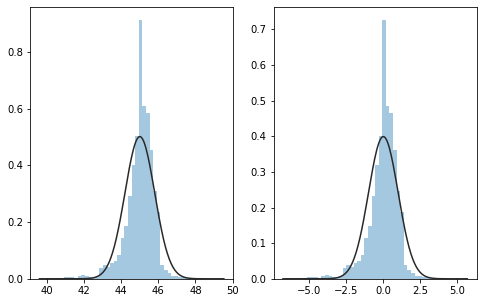

In [13]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0 = LTCWT_normal['LT CW temp, Air Cooler Inlet (TE71)'].dropna().values
sns.distplot(x0, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1 = LTCWT_df_scaled['냉각수온도'].values
sns.distplot(x1, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [ ]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_CW = x1.tolist()
Z_score_CW_table = pd.DataFrame(data=Z_score_CW,columns=['z-score'])
Z_score2_CW = []
for i in range(len(Z_score_CW)):
    if Z_score_CW[i] < 0:
        Z_score2_CW.append(Z_score_CW[i]/Z_score_CW_table.min().item())
    else:
        Z_score2_CW.append(Z_score_CW[i]/Z_score_CW_table.max().item())
Z_score2_CW_table = pd.DataFrame(data=Z_score2_CW,columns=['z-score2'])     
Z_score3_CW = []
for i in range(len(Z_score2_CW)):
    Z_score3_CW.append(1-Z_score2_CW[i])
Z_score3_CW
Z_score3_CW_table = pd.DataFrame(data=Z_score3_CW,columns=['z-score3'])
Z_score3_CW_table

In [15]:
HTCWT_normal = train_normal_mode3_all[['HT CW temp, Engine Inlet (TE75)']] # Combution/Coolingwater System HT line Cooling water temperature
HTCWT_normal['HT CW temp, Engine Inlet (TE75)'] = pd.to_numeric(HTCWT_normal['HT CW temp, Engine Inlet (TE75)'])
HTCWT_normal_feature=HTCWT_normal.describe() # Combution/Coolingwater 시스템의 입력 냉각수 온도 관련 통계치
HTCWT_normal_feature

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"HT CW temp, Engine Inlet (TE75)"
count,1.416236e+06
mean,7.598168e+01
std,9.376485e-01
min,6.824167e+01
25%,7.600000e+01
50%,7.642167e+01
75%,7.648833e+01
max,7.694667e+01


In [16]:
scaler2 = StandardScaler() #냉각수 온도2 데이터 표준화
scaler2.fit(HTCWT_normal)
HTCWT_scaled = scaler2.transform(HTCWT_normal)
HTCWT_df_scaled = pd.DataFrame(data=HTCWT_scaled, columns=['냉각수온도2'])
HTCWT_df_scaled

,냉각수온도2
0,0.753647
1,0.751869
2,0.750092
3,0.748314
4,0.746537
...,...
1416231,-8.148058
1416232,-8.164056
1416233,-8.181831
1416234,-8.219158


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

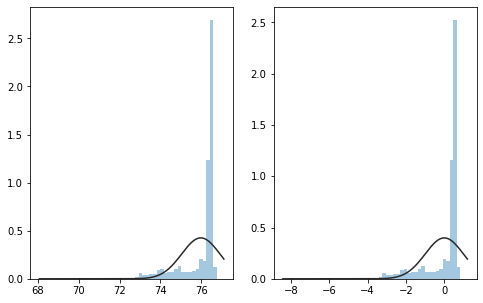

In [17]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_2 = HTCWT_normal['HT CW temp, Engine Inlet (TE75)'].dropna().values
sns.distplot(x0_2, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_2 = HTCWT_df_scaled['냉각수온도2'].values
sns.distplot(x1_2, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [18]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_CW2 = x1_2.tolist()
Z_score_CW2_table = pd.DataFrame(data=Z_score_CW2,columns=['z-score'])
Z_score2_CW2 = []
for i in range(len(Z_score_CW2)):
    if Z_score_CW2[i] < 0:
        Z_score2_CW2.append(Z_score_CW2[i]/Z_score_CW2_table.min().item())
    else:
        Z_score2_CW2.append(Z_score_CW2[i]/Z_score_CW2_table.max().item())
Z_score2_CW2_table = pd.DataFrame(data=Z_score2_CW2,columns=['z-score2'])     
Z_score3_CW2 = []
for i in range(len(Z_score2_CW2)):
    Z_score3_CW2.append(1-Z_score2_CW2[i])
Z_score3_CW2
Z_score3_CW2_table = pd.DataFrame(data=Z_score3_CW2,columns=['z-score3'])
Z_score3_CW2_table

KeyboardInterrupt: 

In [22]:
CAP_normal = train_normal_mode3_all[['Charge Air press, Engine Inlet (PT21X)']] # CAP = Charge Air Pressure
CAP_normal['Charge Air press, Engine Inlet (PT21X)'] = pd.to_numeric(CAP_normal['Charge Air press, Engine Inlet (PT21X)'])
CAP_normal_feature=CAP_normal.describe() # 소기 공기 압력 관련 통계치
CAP_normal_feature

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"Charge Air press, Engine Inlet (PT21X)"
count,1.416236e+06
mean,4.055486e+00
std,3.419876e-01
min,1.904400e+00
25%,4.077067e+00
50%,4.216500e+00
75%,4.246433e+00
max,4.611633e+00


In [23]:
scaler3 = StandardScaler() #소기공기 압력 데이터 표준화
scaler3.fit(CAP_normal)
CAP_scaled = scaler3.transform(CAP_normal)
CAP_df_scaled = pd.DataFrame(data=CAP_scaled, columns=['소기공기압력'])
CAP_df_scaled

,소기공기압력
0,-3.575285
1,-3.575139
2,-3.574992
3,-3.574846
4,-3.574700
...,...
1416231,-4.258058
1416232,-4.258107
1416233,-4.258107
1416234,-4.258156


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

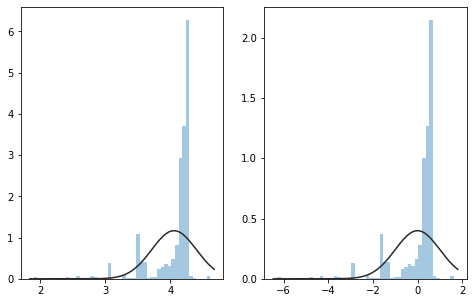

In [24]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_3 = CAP_normal['Charge Air press, Engine Inlet (PT21X)'].dropna().values
sns.distplot(x0_3, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_3 = CAP_df_scaled['소기공기압력'].values
sns.distplot(x1_3, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [23]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_CAP = x1_3.tolist()
Z_score_CAP_table = pd.DataFrame(data=Z_score_CAP,columns=['z-score'])
Z_score2_CAP = []
for i in range(len(Z_score_CAP)):
    if Z_score_CAP[i] < 0:
        Z_score2_CAP.append(Z_score_CAP[i]/Z_score_CAP_table.min().item())
    else:
        Z_score2_CAP.append(Z_score_CAP[i]/Z_score_CAP_table.max().item())
Z_score2_CAP_table = pd.DataFrame(data=Z_score2_CAP,columns=['z-score2'])     
Z_score3_CAP = []
for i in range(len(Z_score2_CAP)):
    Z_score3_CAP.append(1-Z_score2_CAP[i])
Z_score3_CAP
Z_score3_CAP_table = pd.DataFrame(data=Z_score3_CAP,columns=['z-score3'])
Z_score3_CAP_table

KeyboardInterrupt: 

In [27]:
CAT_normal = train_normal_mode3_all[['Charge Air temp, Engine Inlet (TE21X)']] # CAT = Charge Air Temperature
CAT_normal['Charge Air temp, Engine Inlet (TE21X)'] = pd.to_numeric(CAT_normal['Charge Air temp, Engine Inlet (TE21X)'])
CAT_feature_normal=CAT_normal.describe() # 소기 공기 온도 관련 통계치
CAT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"Charge Air temp, Engine Inlet (TE21X)"
count,1.416236e+06
mean,4.894754e+01
std,3.612208e-01
min,4.556667e+01
25%,4.899667e+01
50%,4.900000e+01
75%,4.900000e+01
max,5.010333e+01


In [28]:
scaler4 = StandardScaler() #소기공기 온도 데이터 표준화
scaler4.fit(CAT_normal)
CAT_scaled = scaler4.transform(CAT_normal)
CAT_df_scaled = pd.DataFrame(data=CAT_scaled, columns=['소기공기온도'])
CAT_df_scaled

,소기공기온도
0,-3.527495
1,-3.532109
2,-3.536723
3,-3.541337
4,-3.545951
...,...
1416231,0.006817
1416232,0.006817
1416233,0.006817
1416234,0.006817


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

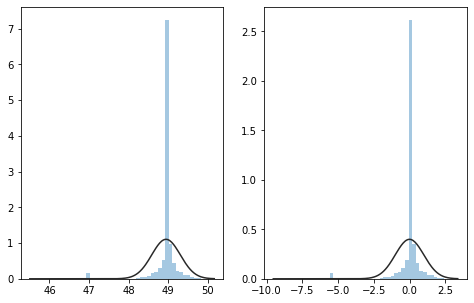

In [29]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_4 = CAT_normal['Charge Air temp, Engine Inlet (TE21X)'].dropna().values
sns.distplot(x0_4, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_4 = CAT_df_scaled['소기공기온도'].values
sns.distplot(x1_4, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [24]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_CAT = x1_4.tolist()
Z_score_CAT_table = pd.DataFrame(data=Z_score_CAT,columns=['z-score'])
Z_score2_CAT = []
for i in range(len(Z_score_CAT)):
    if Z_score_CAT[i] < 0:
        Z_score2_CAT.append(Z_score_CAT[i]/Z_score_CAT_table.min().item())
    else:
        Z_score2_CAT.append(Z_score_CAT[i]/Z_score_CAT_table.max().item())
Z_score2_CAT_table = pd.DataFrame(data=Z_score2_CAT,columns=['z-score2'])     
Z_score3_CAT = []
for i in range(len(Z_score2_CAT)):
    Z_score3_CAT.append(1-Z_score2_CAT[i])
Z_score3_CAT
Z_score3_CAT_table = pd.DataFrame(data=Z_score3_CAT,columns=['z-score3'])
Z_score3_CAT_table

KeyboardInterrupt: 

In [32]:
BT_normal = train_normal_mode3_all[['Main bearing temp average']] # BT = Bearing Temperature
BT_normal['Main bearing temp average'] = pd.to_numeric(BT_normal['Main bearing temp average'])
BT_feature_normal=BT_normal.describe() #베어링 온도 관련 통계치
BT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Main bearing temp average
count,1.416236e+06
mean,8.622301e+01
std,1.004721e+00
min,7.745091e+01
25%,8.609288e+01
50%,8.663727e+01
75%,8.680152e+01
max,8.722727e+01


In [33]:
scaler5 = StandardScaler() #베어링 온도 데이터 표준화
scaler5.fit(BT_normal)
BT_scaled = scaler5.transform(BT_normal)
BT_df_scaled = pd.DataFrame(data=BT_scaled, columns=['베어링온도'])
BT_df_scaled

,베어링온도
0,-8.730885
1,-8.721233
2,-8.711582
3,-8.702081
4,-8.692581
...,...
1416231,-4.332407
1416232,-4.332558
1416233,-4.332860
1416234,-4.333161


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

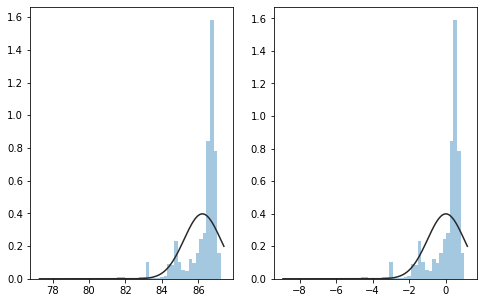

In [34]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_5 = BT_normal['Main bearing temp average'].dropna().values
sns.distplot(x0_5, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_5 = BT_df_scaled['베어링온도'].values
sns.distplot(x1_5, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [25]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
#베어링 온도는 단측검정이므로 음수일 때는 만점(1점)을 부여하고 양수일 때만 따지도록 한다 
Z_score_BT = x1_5.tolist()
Z_score_BT_table = pd.DataFrame(data=Z_score_BT,columns=['z-score'])
Z_score2_BT = []
for i in range(len(Z_score_BT)):
    if Z_score_BT[i] < 0:
        Z_score2_BT.append(0)
    else:
        Z_score2_BT.append(Z_score_BT[i]/Z_score_BT_table.max().item())
Z_score2_BT_table = pd.DataFrame(data=Z_score2_BT,columns=['z-score2'])     
Z_score3_BT = []
for i in range(len(Z_score2_BT)):
    Z_score3_BT.append(1-Z_score2_BT[i])
Z_score3_BT
Z_score3_BT_table = pd.DataFrame(data=Z_score3_BT,columns=['z-score3'])
Z_score3_BT_table

KeyboardInterrupt: 

In [37]:
LTCWP_normal = train_normal_mode3_all[['LT CW press, Air Cooler Inlet (PT71)']] # AirCooler System LT line Cooling water pressure
LTCWP_normal['LT CW press, Air Cooler Inlet (PT71)'] = pd.to_numeric(LTCWP_normal['LT CW press, Air Cooler Inlet (PT71)'])
LTCWP_normal_feature=LTCWP_normal.describe() # AirCooler 시스템의 입력 냉각수 압력 관련 통계치
LTCWP_normal_feature

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"LT CW press, Air Cooler Inlet (PT71)"
count,1416236.0
mean,3.0
std,0.0
min,3.0
25%,3.0
50%,3.0
75%,3.0
max,3.0


In [38]:
scaler6 = StandardScaler() #냉각수 압력 데이터 표준화
scaler6.fit(LTCWP_normal)
LTCWP_scaled = scaler6.transform(LTCWP_normal)
LTCWP_df_scaled = pd.DataFrame(data=LTCWP_scaled, columns=['냉각수압력'])
LTCWP_df_scaled

,냉각수압력
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1416231,0.0
1416232,0.0
1416233,0.0
1416234,0.0


In [21]:
#분포를 보아 항상 일정한 값을 가지므로 최종점수에 만점(1점)을 부여한다<Z-score3>
Z_score3_LTCWP=[]
for i in range(len(LTCWP_normal)):
    Z_score3_LTCWP.append(1)
Z_score3_LTCWP
Z_score3_LTCWP_table = pd.DataFrame(data=Z_score3_LTCWP,columns=['z-score3'])
Z_score3_LTCWP_table

,z-score3
0,1
1,1
2,1
3,1
4,1
...,...
1416231,1
1416232,1
1416233,1
1416234,1


In [6]:
GP_normal = train_normal_mode3_all[['Gas press, Engine Inlet (PT87)']] # GP = Gas Pressure
GP_normal['Gas press, Engine Inlet (PT87)'] = pd.to_numeric(GP_normal['Gas press, Engine Inlet (PT87)'])
GP_feature_normal=GP_normal.describe() # 가스압력 관련 통계치
GP_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"Gas press, Engine Inlet (PT87)"
count,1.416236e+06
mean,4.047326e+00
std,3.402599e-01
min,1.900000e+00
25%,4.083500e+00
50%,4.200000e+00
75%,4.218500e+00
max,4.600000e+00


In [7]:
scaler7 = StandardScaler() #가스압력 데이터 표준화
scaler7.fit(GP_normal)
GP_scaled = scaler7.transform(GP_normal)
GP_df_scaled = pd.DataFrame(data=GP_scaled, columns=['가스압력'])
GP_df_scaled

,가스압력
0,-3.644255
1,-3.644255
2,-3.644255
3,-3.644255
4,-3.644255
...,...
1416231,-4.258981
1416232,-4.258981
1416233,-4.258981
1416234,-4.258981


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

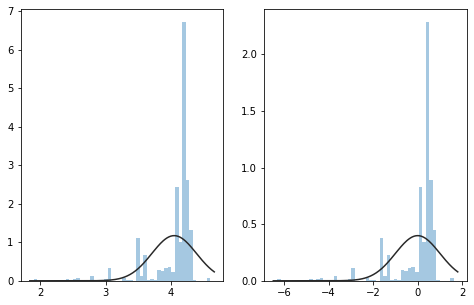

In [8]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_7 = GP_normal['Gas press, Engine Inlet (PT87)'].dropna().values
sns.distplot(x0_7, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_7 = GP_df_scaled['가스압력'].values
sns.distplot(x1_7, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [9]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_GP = x1_7.tolist()
Z_score_GP_table = pd.DataFrame(data=Z_score_GP,columns=['z-score'])
Z_score2_GP = []
for i in range(len(Z_score_GP)):
    if Z_score_GP[i] < 0:
        Z_score2_GP.append(Z_score_GP[i]/Z_score_GP_table.min().item())
    else:
        Z_score2_GP.append(Z_score_GP[i]/Z_score_GP_table.max().item())
Z_score2_GP_table = pd.DataFrame(data=Z_score2_GP,columns=['z-score2'])     
Z_score3_GP = []
for i in range(len(Z_score2_GP)):
    Z_score3_GP.append(1-Z_score2_GP[i])
Z_score3_GP
Z_score3_GP_table = pd.DataFrame(data=Z_score3_GP,columns=['z-score3'])
Z_score3_GP_table

KeyboardInterrupt: 

In [11]:
GT_normal = train_normal_mode3_all[['Gas temp (TE81)']] # GT = Gas Temperature
GT_normal['Gas temp (TE81)'] = pd.to_numeric(GT_normal['Gas temp (TE81)'])
GT_feature_normal=GT_normal.describe() # 가스온도 관련 통계치
GT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gas temp (TE81)
count,1.416236e+06
mean,1.821848e+01
std,1.316454e+00
min,1.625333e+01
25%,1.750333e+01
50%,1.800000e+01
75%,1.893333e+01
max,2.852333e+01


In [12]:
scaler8 = StandardScaler() #가스온도 데이터 표준화
scaler8.fit(GT_normal)
GT_scaled = scaler8.transform(GT_normal)
GT_df_scaled = pd.DataFrame(data=GT_scaled, columns=['가스온도'])
GT_df_scaled

,가스온도
0,7.827743
1,7.825211
2,7.822679
3,7.820147
4,7.817614
...,...
1416231,2.112892
1416232,2.112892
1416233,2.112892
1416234,2.112892


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

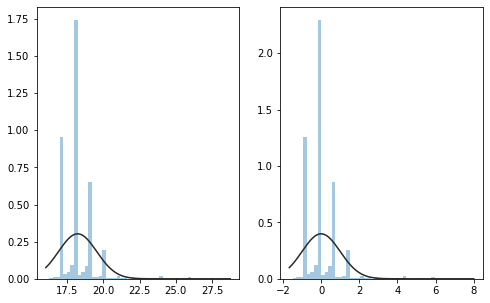

In [13]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_8 = GT_normal['Gas temp (TE81)'].dropna().values
sns.distplot(x0_8, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_8 = GT_df_scaled['가스온도'].values
sns.distplot(x1_8, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [14]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_GT = x1_8.tolist()
Z_score_GT_table = pd.DataFrame(data=Z_score_GT,columns=['z-score'])
Z_score2_GT = []
for i in range(len(Z_score_GT)):
    if Z_score_GT[i] < 0:
        Z_score2_GT.append(Z_score_GT[i]/Z_score_GT_table.min().item())
    else:
        Z_score2_GT.append(Z_score_GT[i]/Z_score_GT_table.max().item())
Z_score2_GT_table = pd.DataFrame(data=Z_score2_GT,columns=['z-score2'])     
Z_score3_GT = []
for i in range(len(Z_score2_GT)):
    Z_score3_GT.append(1-Z_score2_GT[i])
Z_score3_GT
Z_score3_GT_table = pd.DataFrame(data=Z_score3_GT,columns=['z-score3'])
Z_score3_GT_table

KeyboardInterrupt: 

In [19]:
HCWT_normal = train_normal_mode3_all[['HT CW temp, Engine Outlet (TE76)']] # HCWT = HT CW Temperature
HCWT_normal['HT CW temp, Engine Outlet (TE76)'] = pd.to_numeric(HCWT_normal['HT CW temp, Engine Outlet (TE76)'])
HCWT_feature_normal=HCWT_normal.describe() # 냉각수온도 관련 통계치
HCWT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"HT CW temp, Engine Outlet (TE76)"
count,1.416236e+06
mean,8.266988e+01
std,1.117250e+00
min,7.800000e+01
25%,8.216333e+01
50%,8.271500e+01
75%,8.322000e+01
max,8.643833e+01


In [20]:
scaler9 = StandardScaler() #냉각수온도 데이터 표준화
scaler9.fit(HCWT_normal)
HCWT_scaled = scaler9.transform(HCWT_normal)
HCWT_df_scaled = pd.DataFrame(data=HCWT_scaled, columns=['냉각수온도'])
HCWT_df_scaled

,냉각수온도
0,-1.115724
1,-1.117216
2,-1.118708
3,-1.118708
4,-1.118708
...,...
1416231,1.764863
1416232,1.764863
1416233,1.764863
1416234,1.764863


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

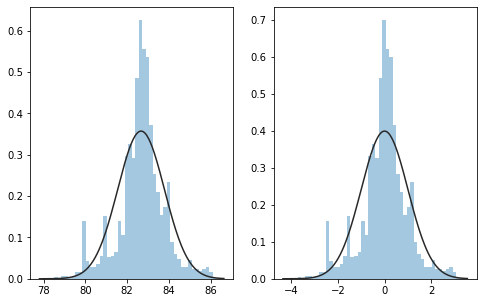

In [21]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_9 = HCWT_normal['HT CW temp, Engine Outlet (TE76)'].dropna().values
sns.distplot(x0_9, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_9 = HCWT_df_scaled['냉각수온도'].values
sns.distplot(x1_9, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [22]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_HCWT = x1_9.tolist()
Z_score_HCWT_table = pd.DataFrame(data=Z_score_HCWT,columns=['z-score'])
Z_score2_HCWT = []
for i in range(len(Z_score_HCWT)):
    if Z_score_HCWT[i] < 0:
        Z_score2_HCWT.append(Z_score_HCWT[i]/Z_score_HCWT_table.min().item())
    else:
        Z_score2_HCWT.append(Z_score_HCWT[i]/Z_score_HCWT_table.max().item())
Z_score2_HCWT_table = pd.DataFrame(data=Z_score2_HCWT,columns=['z-score2'])     
Z_score3_HCWT = []
for i in range(len(Z_score2_HCWT)):
    Z_score3_HCWT.append(1-Z_score2_HCWT[i])
Z_score3_HCWT
Z_score3_HCWT_table = pd.DataFrame(data=Z_score3_HCWT,columns=['z-score3'])
Z_score3_HCWT_table

KeyboardInterrupt: 

In [24]:
LCWT_normal = train_normal_mode3_all[['LT CW temp, Air Cooler Outlet (TE72)']] # LCWT = LT CW Temperature
LCWT_normal['LT CW temp, Air Cooler Outlet (TE72)'] = pd.to_numeric(LCWT_normal['LT CW temp, Air Cooler Outlet (TE72)'])
LCWT_feature_normal=LCWT_normal.describe() # 냉각수온도 관련 통계치
LCWT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,"LT CW temp, Air Cooler Outlet (TE72)"
count,1.416236e+06
mean,4.770472e+01
std,7.866185e-01
min,4.233833e+01
25%,4.765333e+01
50%,4.799667e+01
75%,4.802833e+01
max,5.179500e+01


In [25]:
scaler10 = StandardScaler() #냉각수온도 데이터 표준화
scaler10.fit(LCWT_normal)
LCWT_scaled = scaler10.transform(LCWT_normal)
LCWT_df_scaled = pd.DataFrame(data=LCWT_scaled, columns=['냉각수온도'])
LCWT_df_scaled

,냉각수온도
0,2.220828
1,2.210234
2,2.199641
3,2.189047
4,2.178453
...,...
1416231,-3.777422
1416232,-3.777422
1416233,-3.777422
1416234,-3.777422


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

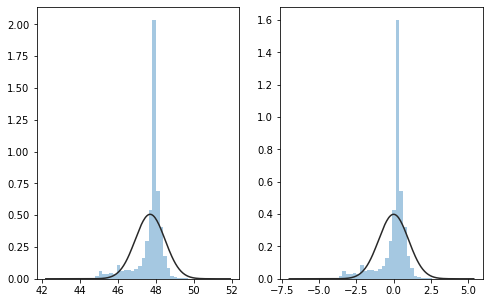

In [30]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_10 = LCWT_normal['LT CW temp, Air Cooler Outlet (TE72)'].dropna().values
sns.distplot(x0_10, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_10 = LCWT_df_scaled['냉각수온도'].values
sns.distplot(x1_10, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [27]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_LCWT = x1_10.tolist()
Z_score_LCWT_table = pd.DataFrame(data=Z_score_LCWT,columns=['z-score'])
Z_score2_LCWT = []
for i in range(len(Z_score_LCWT)):
    if Z_score_LCWT[i] < 0:
        Z_score2_LCWT.append(Z_score_LCWT[i]/Z_score_LCWT_table.min().item())
    else:
        Z_score2_LCWT.append(Z_score_LCWT[i]/Z_score_LCWT_table.max().item())
Z_score2_LCWT_table = pd.DataFrame(data=Z_score2_LCWT,columns=['z-score2'])     
Z_score3_LCWT = []
for i in range(len(Z_score2_LCWT)):
    Z_score3_LCWT.append(1-Z_score2_LCWT[i])
Z_score3_LCWT
Z_score3_LCWT_table = pd.DataFrame(data=Z_score3_LCWT,columns=['z-score3'])
Z_score3_LCWT_table

KeyboardInterrupt: 

In [28]:
BG_normal = train_normal_mode3_all[['Base duration gas admission']] # BG = Base duration gas admission
BG_normal['Base duration gas admission'] = pd.to_numeric(BG_normal['Base duration gas admission'])
BG_feature_normal=BG_normal.describe() # BG 관련 통계치
BG_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Base duration gas admission
count,1.416236e+06
mean,9.051361e+01
std,4.653439e+00
min,6.009000e+01
25%,9.021000e+01
50%,9.240667e+01
75%,9.305667e+01
max,9.580500e+01


In [29]:
scaler11 = StandardScaler() #BG 데이터 표준화
scaler11.fit(BG_normal)
BG_scaled = scaler11.transform(BG_normal)
BG_df_scaled = pd.DataFrame(data=BG_scaled, columns=['BG'])
BG_df_scaled

,BG
0,-3.520039
1,-3.520039
2,-3.520039
3,-3.520039
4,-3.520039
...,...
1416231,-4.365650
1416232,-4.365650
1416233,-4.365650
1416234,-4.365650


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

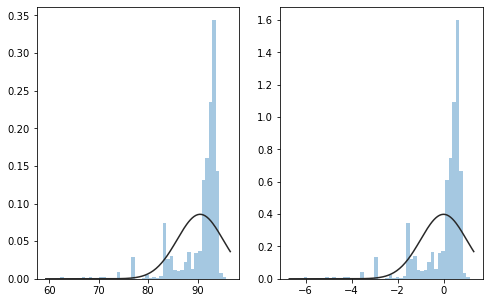

In [31]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_11 = BG_normal['Base duration gas admission'].dropna().values
sns.distplot(x0_11, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_11 = BG_df_scaled['BG'].values
sns.distplot(x1_11, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [32]:
 #이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_BG = x1_11.tolist()
Z_score_BG_table = pd.DataFrame(data=Z_score_BG,columns=['z-score'])
Z_score2_BG = []
for i in range(len(Z_score_BG)):
    if Z_score_BG[i] < 0:
        Z_score2_BG.append(Z_score_BG[i]/Z_score_BG_table.min().item())
    else:
        Z_score2_BG.append(Z_score_BG[i]/Z_score_BG_table.max().item())
Z_score2_BG_table = pd.DataFrame(data=Z_score2_BG,columns=['z-score2'])     
Z_score3_BG = []
for i in range(len(Z_score2_BG)):
    Z_score3_BG.append(1-Z_score2_BG[i])
Z_score3_BG
Z_score3_BG_table = pd.DataFrame(data=Z_score3_BG,columns=['z-score3'])
Z_score3_BG_table

KeyboardInterrupt: 

In [33]:
WV_normal = train_normal_mode3_all[['Waste Gate Valve position command (CV26)']] # LCWT = Waste Gate Valve position command (CV26)
WV_normal['Waste Gate Valve position command (CV26)'] = pd.to_numeric(WV_normal['Waste Gate Valve position command (CV26)'])
WV_feature_normal=WV_normal.describe() # WV 관련 통계치
WV_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Waste Gate Valve position command (CV26)
count,1.416236e+06
mean,1.629096e+01
std,2.368065e+00
min,1.563333e+00
25%,1.511667e+01
50%,1.667667e+01
75%,1.788667e+01
max,2.649833e+01


In [34]:
scaler12 = StandardScaler() #WV 데이터 표준화
scaler12.fit(WV_normal)
WV_scaled = scaler12.transform(WV_normal)
WV_df_scaled = pd.DataFrame(data=WV_scaled, columns=['WV'])
WV_df_scaled

,WV
0,-6.219267
1,-6.216452
2,-6.213637
3,-6.211525
4,-6.209414
...,...
1416231,-2.544677
1416232,-2.544677
1416233,-2.545380
1416234,-2.546084


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

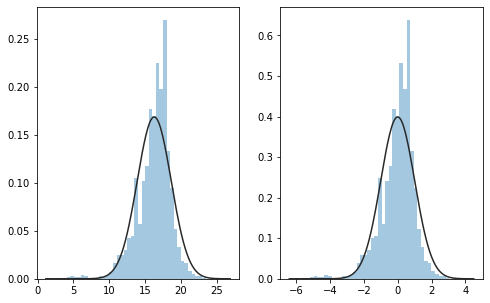

In [35]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_12 = WV_normal['Waste Gate Valve position command (CV26)'].dropna().values
sns.distplot(x0_12, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_12 = WV_df_scaled['WV'].values
sns.distplot(x1_12, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [36]:
 #이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_WV = x1_12.tolist()
Z_score_WV_table = pd.DataFrame(data=Z_score_WV,columns=['z-score'])
Z_score2_WV = []
for i in range(len(Z_score_WV)):
    if Z_score_WV[i] < 0:
        Z_score2_WV.append(Z_score_WV[i]/Z_score_WV_table.min().item())
    else:
        Z_score2_WV.append(Z_score_WV[i]/Z_score_WV_table.max().item())
Z_score2_WV_table = pd.DataFrame(data=Z_score2_WV,columns=['z-score2'])     
Z_score3_WV = []
for i in range(len(Z_score2_WV)):
    Z_score3_WV.append(1-Z_score2_WV[i])
Z_score3_WV
Z_score3_WV_table = pd.DataFrame(data=Z_score3_WV,columns=['z-score3'])
Z_score3_WV_table

KeyboardInterrupt: 

In [37]:
DVT_normal = train_normal_mode3_all[['DVT control air press (PT43)']] # DVT = DVT control air press (PT43)
DVT_normal['DVT control air press (PT43)'] = pd.to_numeric(DVT_normal['DVT control air press (PT43)'])
DVT_feature_normal=DVT_normal.describe() # DVT 관련 통계치
DVT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DVT control air press (PT43)
count,1.416236e+06
mean,6.926865e+00
std,4.470245e-01
min,-3.000000e-02
25%,6.989500e+00
50%,7.024533e+00
75%,7.055933e+00
max,7.182967e+00


In [38]:
scaler13 = StandardScaler() #DVT 데이터 표준화
scaler13.fit(DVT_normal)
DVT_scaled = scaler13.transform(DVT_normal)
DVT_df_scaled = pd.DataFrame(data=DVT_scaled, columns=['DVT'])
DVT_df_scaled

,DVT
0,-3.121640
1,-3.121602
2,-3.121565
3,-3.121528
4,-3.121490
...,...
1416231,-1.873945
1416232,-1.874206
1416233,-1.874429
1416234,-1.874653


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

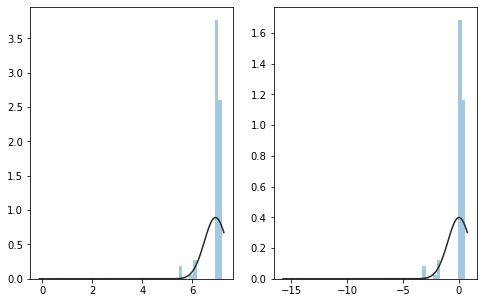

In [39]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_13 = DVT_normal['DVT control air press (PT43)'].dropna().values
sns.distplot(x0_13, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_13 = DVT_df_scaled['DVT'].values
sns.distplot(x1_13, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [40]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_DVT = x1_13.tolist()
Z_score_DVT_table = pd.DataFrame(data=Z_score_DVT,columns=['z-score'])
Z_score2_DVT = []
for i in range(len(Z_score_DVT)):
    if Z_score_DVT[i] < 0:
        Z_score2_DVT.append(Z_score_DVT[i]/Z_score_DVT_table.min().item())
    else:
        Z_score2_DVT.append(Z_score_DVT[i]/Z_score_DVT_table.max().item())
Z_score2_DVT_table = pd.DataFrame(data=Z_score2_DVT,columns=['z-score2'])     
Z_score3_DVT = []
for i in range(len(Z_score2_DVT)):
    Z_score3_DVT.append(1-Z_score2_DVT[i])
Z_score3_DVT
Z_score3_DVT_table = pd.DataFrame(data=Z_score3_DVT,columns=['z-score3'])
Z_score3_DVT_table

KeyboardInterrupt: 

In [42]:
FOP_normal = train_normal_mode3_all[['FO Pressure Engine Inlet']] # FOP = FO Pressure Engine Inlet
FOP_normal['FO Pressure Engine Inlet'] = pd.to_numeric(FOP_normal['FO Pressure Engine Inlet'])
FOP_feature_normal=FOP_normal.describe() # 연료압력 관련 통계치
FOP_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FO Pressure Engine Inlet
count,1.416236e+06
mean,9.999997e+02
std,9.727720e-02
min,9.994867e+02
25%,9.999417e+02
50%,9.999983e+02
75%,1.000055e+03
max,1.000630e+03


In [43]:
scaler14 = StandardScaler() #연료압력 데이터 표준화
scaler14.fit(FOP_normal)
FOP_scaled = scaler14.transform(FOP_normal)
FOP_df_scaled = pd.DataFrame(data=FOP_scaled, columns=['연료압력'])
FOP_df_scaled

,연료압력
0,1.681799
1,1.613266
2,1.544733
3,1.476201
4,1.407668
...,...
1416231,0.842273
1416232,0.790874
1416233,0.773741
1416234,0.739474


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

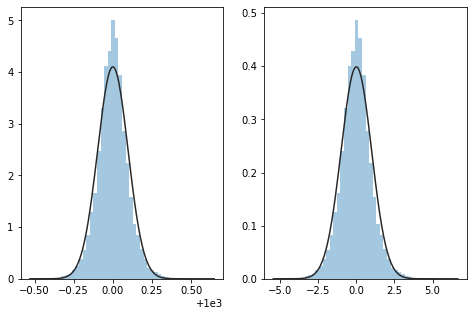

In [44]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_14 = FOP_normal['FO Pressure Engine Inlet'].dropna().values
sns.distplot(x0_14, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_14 = FOP_df_scaled['연료압력'].values
sns.distplot(x1_14, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [45]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_FOP = x1_14.tolist()
Z_score_FOP_table = pd.DataFrame(data=Z_score_FOP,columns=['z-score'])
Z_score2_FOP = []
for i in range(len(Z_score_FOP)):
    if Z_score_FOP[i] < 0:
        Z_score2_FOP.append(Z_score_FOP[i]/Z_score_FOP_table.min().item())
    else:
        Z_score2_FOP.append(Z_score_FOP[i]/Z_score_FOP_table.max().item())
Z_score2_FOP_table = pd.DataFrame(data=Z_score2_FOP,columns=['z-score2'])     
Z_score3_FOP = []
for i in range(len(Z_score2_FOP)):
    Z_score3_FOP.append(1-Z_score2_FOP[i])
Z_score3_FOP
Z_score3_FOP_table = pd.DataFrame(data=Z_score3_FOP,columns=['z-score3'])
Z_score3_FOP_table

KeyboardInterrupt: 

In [47]:
FOT_normal = train_normal_mode3_all[['FO Temperature Engine Inlet']] # FOT = FO Temperature Engine Inlet
FOT_normal['FO Temperature Engine Inlet'] = pd.to_numeric(FOT_normal['FO Temperature Engine Inlet'])
FOT_feature_normal=FOT_normal.describe() # 연료온도 관련 통계치
FOT_feature_normal

C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FO Temperature Engine Inlet
count,1.416236e+06
mean,3.708318e+01
std,2.252460e+00
min,3.202000e+01
25%,3.504667e+01
50%,3.700000e+01
75%,3.894833e+01
max,4.300000e+01


In [48]:
scaler15 = StandardScaler() #연료온도 데이터 표준화
scaler15.fit(FOT_normal)
FOT_scaled = scaler15.transform(FOT_normal)
FOT_df_scaled = pd.DataFrame(data=FOT_scaled, columns=['연료온도'])
FOT_df_scaled

,연료온도
0,-0.924848
1,-0.924848
2,-0.924848
3,-0.924848
4,-0.924848
...,...
1416231,-0.480888
1416232,-0.480888
1416233,-0.480888
1416234,-0.480888


C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bigcompetmgr01\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

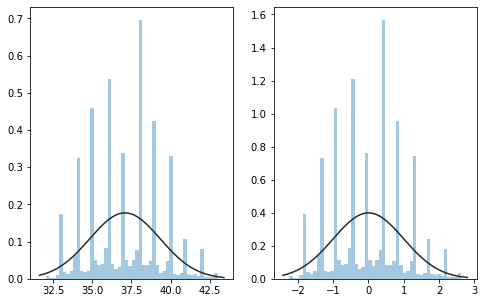

In [49]:
f,ax = plt.subplots(1,2,figsize=(8,5))
x0_15 = FOT_normal['FO Temperature Engine Inlet'].dropna().values
sns.distplot(x0_15, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #표준화 이전
x1_15 = FOT_df_scaled['연료온도'].values
sns.distplot(x1_15, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) #표준화 이후

In [50]:
#이상치 제거가 되지 않은 상태로 그대로 진행
#Z점수 = (X(변량)-mean(평균))/std(표준편차)인데, <Z-score1>
#해당 데이터는 0점(평균)기준으로 좌우 분포가 다르기 때문에 최대값(9.xxx...).최소값(-2.xxx...)이 달라 하나의 값을 기준으로하여 
#새로운 점수로 변환할 수 없다. 따라서
#0이상일때(우측) - 최대값 분모에 적용 / 0미만일때(좌측) - 최솟값을 분모로 적용(음수/음수=양수이므로 절대값 취하지않음) <Z-score2>
#이렇게 하면 정상에 가까울수록 점수가 0, 고장에 가까울수록 점수가 1이 되는데 우리는 정상일 때 점수를 1, 고장일 때 점수를 0으로 설정
#따라서 해당 값을 1에서 뺀 값으로 선형변환하여 점수를 재설정 하여 최종 점수를 준다 <Z-score3>
Z_score_FOT = x1_15.tolist()
Z_score_FOT_table = pd.DataFrame(data=Z_score_FOT,columns=['z-score'])
Z_score2_FOT = []
for i in range(len(Z_score_FOT)):
    if Z_score_FOT[i] < 0:
        Z_score2_FOT.append(Z_score_FOT[i]/Z_score_FOT_table.min().item())
    else:
        Z_score2_FOT.append(Z_score_FOT[i]/Z_score_FOT_table.max().item())
Z_score2_FOT_table = pd.DataFrame(data=Z_score2_FOT,columns=['z-score2'])     
Z_score3_FOT = []
for i in range(len(Z_score2_FOT)):
    Z_score3_FOT.append(1-Z_score2_FOT[i])
Z_score3_FOT
Z_score3_FOT_table = pd.DataFrame(data=Z_score3_FOT,columns=['z-score3'])
Z_score3_FOT_table

KeyboardInterrupt: 